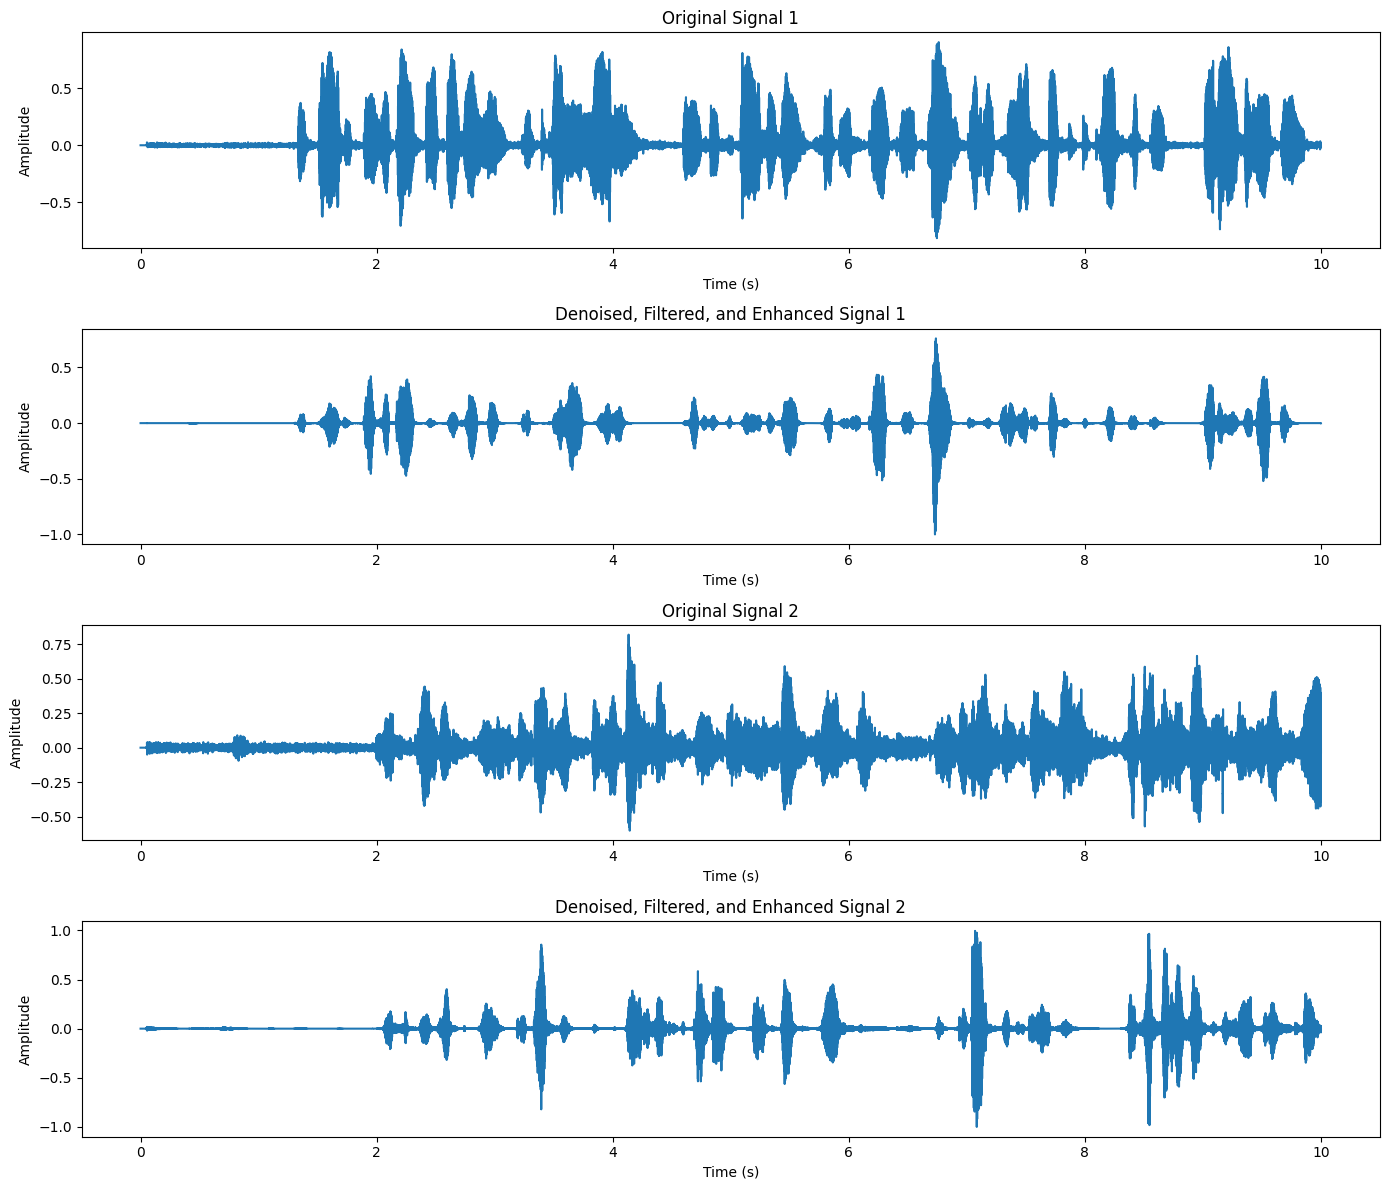

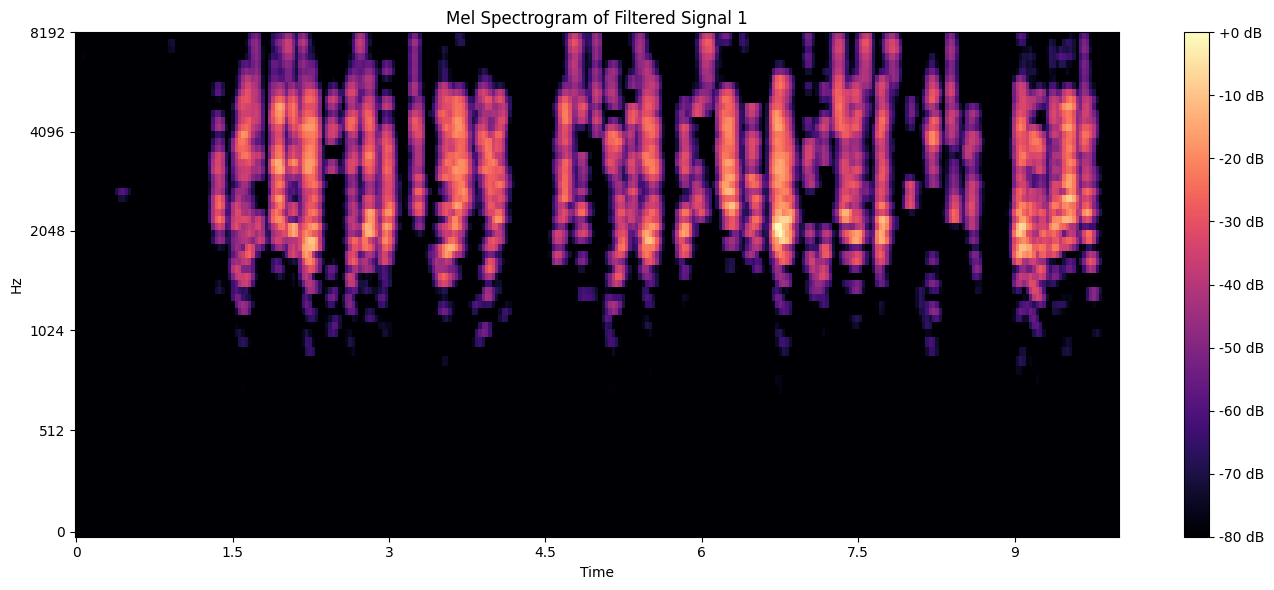

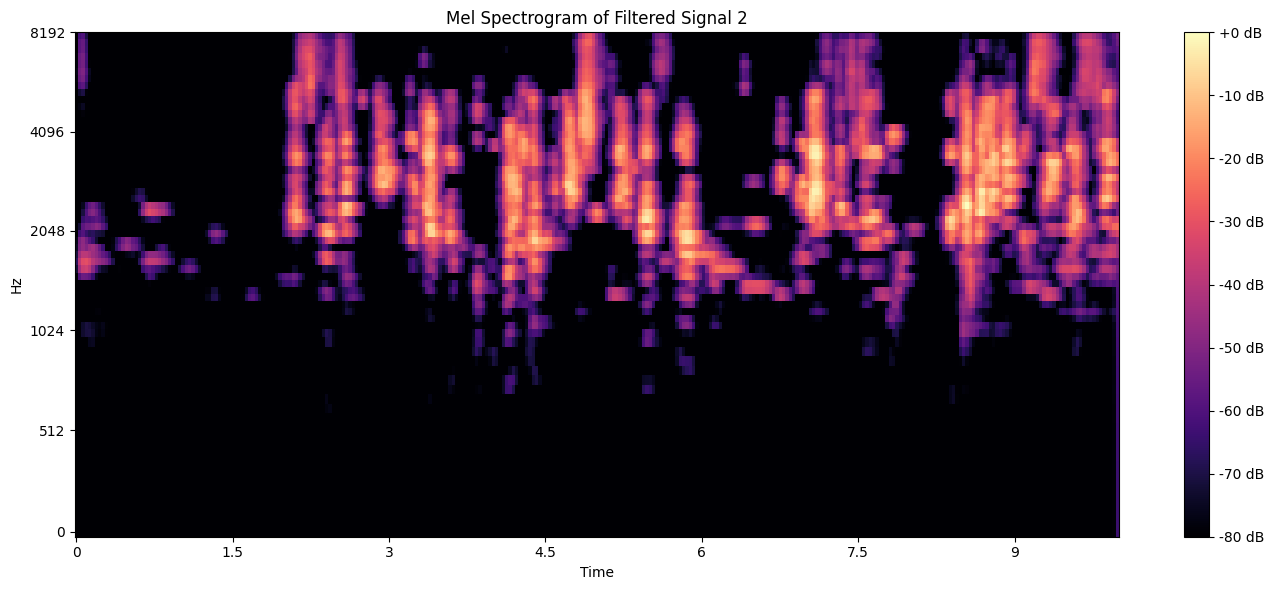

In [4]:
import librosa
import librosa.display
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from pylab import rcParams
import noisereduce as nr

rcParams['figure.figsize'] = 14, 6

import warnings
warnings.filterwarnings('ignore')

sr = 16000
e_file1 = 'audio.wav'
e_file2 = 'audio1.wav'


y1, sr = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=10)
y2, sr = librosa.load(e_file2, mono=True, sr=sr, offset=0, duration=10)

from IPython.display import Audio, display

display(Audio(y1, rate=sr))
display(Audio(y2, rate=sr))

# Noise reduction with more tuned parameters
y1_denoised = nr.reduce_noise(y=y1, sr=sr, prop_decrease=1.0, time_mask_smooth_ms=80, freq_mask_smooth_hz=80)
y2_denoised = nr.reduce_noise(y=y2, sr=sr, prop_decrease=1.0, time_mask_smooth_ms=80, freq_mask_smooth_hz=80)

# Apply high-pass filter to remove low-frequency noise
def f_high(y, sr):
    b, a = scipy.signal.butter(10, 2000 / (sr / 2), btype='highpass')
    yf = scipy.signal.lfilter(b, a, y)
    return yf

yf1 = f_high(y1_denoised, sr)
yf2 = f_high(y2_denoised, sr)

# Normalize the signals to enhance volume levels
yf1 = yf1 / np.max(np.abs(yf1))
yf2 = yf2 / np.max(np.abs(yf2))

# Plot waveforms using matplotlib
plt.figure(figsize=(14, 12))

plt.subplot(4, 1, 1)
plt.plot(np.arange(len(y1)) / sr, y1)
plt.title('Original Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(np.arange(len(yf1)) / sr, yf1)
plt.title('Denoised, Filtered, and Enhanced Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(np.arange(len(y2)) / sr, y2)
plt.title('Original Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(np.arange(len(yf2)) / sr, yf2)
plt.title('Denoised, Filtered, and Enhanced Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Mel spectrograms of filtered signals
Sf1 = librosa.feature.melspectrogram(y=yf1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
plt.figure(figsize=(14, 6))
librosa.display.specshow(Df1, x_axis='time', y_axis='mel', sr=sr)
plt.title('Mel Spectrogram of Filtered Signal 1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

Sf2 = librosa.feature.melspectrogram(y=yf2, sr=sr, n_mels=64)
Df2 = librosa.power_to_db(Sf2, ref=np.max)
plt.figure(figsize=(14, 6))
librosa.display.specshow(Df2, x_axis='time', y_axis='mel', sr=sr)
plt.title('Mel Spectrogram of Filtered Signal 2')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

display(Audio(yf1, rate=sr))
display(Audio(yf2, rate=sr))
